<a href="https://colab.research.google.com/github/Guru-180188/Projects/blob/main/Male_vs_Female.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/ .kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d cashutosh/gender-classification-dataset

gender-classification-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/gender-classification-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory=r"/content/Training",
    batch_size=32,
    image_size=(256,256), labels="inferred",
    label_mode="int"
)
validation_ds=keras.utils.image_dataset_from_directory(
  directory=r"/content/Validation",
  batch_size=32,
  image_size=(256,256), labels="inferred",
  label_mode="int"
)

Found 47009 files belonging to 2 classes.
Found 11649 files belonging to 2 classes.


In [ ]:
for i in train_ds:
  print(i)

Streaming output truncated to the last 5000 lines.
         [1.72189453e+02, 1.81189453e+02, 1.54189453e+02]],

        [[1.27207031e+02, 9.62070312e+01, 7.82070312e+01],
         [1.27207031e+02, 9.62070312e+01, 7.82070312e+01],
         [1.28789093e+02, 9.77890854e+01, 7.97890854e+01],
         ...,
         [1.68861313e+02, 1.78584015e+02, 1.51453140e+02],
         [1.69982422e+02, 1.78982422e+02, 1.51982422e+02],
         [1.69982422e+02, 1.78982422e+02, 1.51982422e+02]],

        ...,

        [[2.05207031e+02, 2.24140625e+01, 3.36210938e+01],
         [2.05207031e+02, 2.24140625e+01, 3.36210938e+01],
         [2.03949249e+02, 2.26758041e+01, 3.33535500e+01],
         ...,
         [1.90121033e+02, 2.60624428e+01, 2.93261147e+01],
         [1.89585938e+02, 2.53964844e+01, 2.80000000e+01],
         [1.89585938e+02, 2.53964844e+01, 2.80000000e+01]],

        [[2.04324219e+02, 2.06484375e+01, 3.09726562e+01],
         [2.04324219e+02, 2.06484375e+01, 3.09726562e+01],
         [2.0350

In [ ]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))

model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 128)      

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(train_ds,epochs=3,validation_data=validation_ds)

Epoch 1/3
1470/1470 [==============================] - 122s 74ms/step - loss: 0.2613 - accuracy: 0.8911 - val_loss: 0.1784 - val_accuracy: 0.9310
Epoch 2/3
1470/1470 [==============================] - 111s 75ms/step - loss: 0.1588 - accuracy: 0.9401 - val_loss: 0.1435 - val_accuracy: 0.9453
Epoch 3/3
1470/1470 [==============================] - 109s 74ms/step - loss: 0.1247 - accuracy: 0.9541 - val_loss: 0.1763 - val_accuracy: 0.9333


In [ ]:
import matplotlib.pyplot as plt
men_img=plt.imread(r"/content/men.jpg")

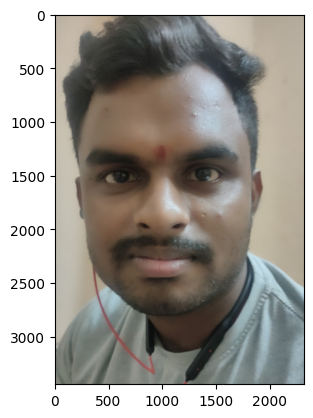

In [ ]:
plt.imshow(men_img)

In [ ]:
women_img=plt.imread(r"/content/women.jpg")

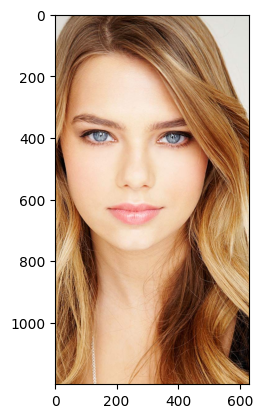

In [ ]:
plt.imshow(women_img)

In [ ]:
women_img.shape

(1200, 630, 3)

In [ ]:
women_img.shape

(1200, 630, 3)

In [ ]:
import cv2
men_resize = cv2.resize(men_img,(256,256))
women_resize = cv2.resize(women_img,(256,256))

In [ ]:
men_resize.shape

(256, 256, 3)

In [ ]:
women_resize.shape

(256, 256, 3)

In [ ]:
men_resize=men_resize.reshape((1,256,256,3))

In [ ]:
men_resize.shape

(1, 256, 256, 3)

In [ ]:
women_resize=women_resize.reshape((1,256,256,3))

In [ ]:
women_resize.shape

(1, 256, 256, 3)

In [ ]:
pred=model.predict(women_resize)

1/1 [==============================] - 0s 112ms/step


In [ ]:
#model.predict(cat_resize)

In [ ]:
if pred == 0:
  print("this is a image of women")
else:
  print("this is a image of men")

this is a image of women
